In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd
from pytz import all_timezones

In [ ]:
tsv_file = open("./testdata/PanAltz.txt")
dates = []
o3 = []
unc = []
massf = []
diffc = []
qf = []
S2idq1 = []
S2idq2 = []

for line in tsv_file:
    lsplit = line.split()
    try:
        dates.append(dt.datetime.strptime(lsplit[0], '%Y%m%dT%H%M%S.%fZ'))
    except: 
        dates.append(dt.datetime.strptime(lsplit[0], '%Y%m%dT%H%M%SZ'))
    o3.append(float(lsplit[7]))
    unc.append(float(lsplit[8]))
    massf.append(float(lsplit[9]))
    diffc.append(float(lsplit[10]))
    qf.append(int(lsplit[11]))
    S2idq1.append(float(lsplit[12]))
    S2idq2.append(float(lsplit[13]))

tsv_file.close()

dtime = np.array(dates)
ozone = np.array(o3)
uncty = np.array(unc)
o3massf = np.array(massf)
diffcorr = np.array(diffc)
qflag = np.array(qf)
sum2iDQ1 = np.array(S2idq1)
sum2iDQ2 = np.array(S2idq2)

In [ ]:
mask = (qflag == 0) | (qflag == 1) | (qflag == 10) | (qflag == 11)

In [ ]:
mask = (qflag == 0) | (qflag == 10) 

In [ ]:
tsv_file.close()

In [ ]:
#plt.figure(figsize=(10,10))
locator = mdates.AutoDateLocator()
formatter = mdates.DateFormatter('%Y/%m')
fig, ax = plt.subplots(figsize=(15,10))
plt.plot_date(dtime[mask],ozone[mask]*2.6868e16) 
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#plt.xlabel('Date', size =15)
plt.ylabel('molecule/cm$^2$', size =15)
plt.title("Ozone (QF 0,10: high; assured, not-assured)", size =20)
#plt.tight_layout()
#plt.savefig(name_plotout)
plt.show()

In [ ]:
for ele in sum2iDQ1:
    print(ele)

In [ ]:
print(ozone[mask].shape,qflag.shape)

In [ ]:
np.savez("PandoraCCA", dtime=dtime, ozone=ozone,uncty = uncty,o3massf = o3massf, diffcorr = diffcorr, qflag = qflag, sum2iDQ1 = sum2iDQ1, sum2iDQ2 = sum2iDQ2)

In [ ]:
for ele,ii in enumerate(dtime):
    if (ele.hour > 0) & (ele.hour < 13):
        print(ele.strftime("%d-%b-%Y (%H:%M:%S.%f)"))

In [ ]:
for ii,ele in enumerate(dtime):
    print(ele)

In [ ]:
t0 = dt.datetime.utcfromtimestamp(0.0)
tepoch = np.array([(ele-t0).total_seconds() for ele in dtime])
print(tepoch)

In [ ]:
print(tepoch.shape)

In [ ]:
firstday = dt.datetime(year=dtime[0].year,month=dtime[0].month,day=dtime[0].day)
localfirstday = dt.datetime.fromtimestamp((firstday-t0).total_seconds())
print(firstday,localfirstday)

In [ ]:
for ele in tepoch:
    tmp = dt.datetime.fromtimestamp(ele)
    print(tmp)

In [ ]:
#necesito hacer un epoch para ir hora por hora haciendo los promedios, o quiza se pueda hacer dia por dia

In [2]:
#### PANDAS test

In [2]:
npz = np.load('PandoraAltz.npz',allow_pickle=True)
df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files})

In [3]:
df.dtypes

dtime       datetime64[ns]
ozone              float64
uncty              float64
o3massf            float64
diffcorr           float64
qflag                int64
sum2iDQ1           float64
sum2iDQ2           float64
dtype: object

In [4]:
options = [0,10] 
rslt_df = df[df['qflag'].isin(options)] 

In [5]:
# Filtered data by qflag 0,10
rslt_df

,dtime,ozone,uncty,o3massf,diffcorr,qflag,sum2iDQ1,sum2iDQ2
562,2019-02-01 15:39:56.000,231.93,0.077097,1.915,0.0,0,0.0,0.0
563,2019-02-01 15:41:21.000,232.15,0.075858,1.900,0.0,0,0.0,0.0
564,2019-02-01 15:42:48.000,231.43,0.107100,1.886,0.0,0,0.0,0.0
565,2019-02-01 15:44:12.000,231.30,0.081117,1.871,0.0,0,0.0,0.0
566,2019-02-01 15:45:38.000,231.54,0.080339,1.858,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
45825,2021-05-25 17:08:18.600,252.34,0.211250,1.062,0.0,10,0.0,0.0
45827,2021-05-25 17:18:07.400,252.42,0.080186,1.048,0.0,10,0.0,0.0
45830,2021-05-25 17:32:50.400,252.51,0.076676,1.030,0.0,10,0.0,0.0
45832,2021-05-25 17:50:55.700,252.56,0.335810,1.015,0.0,10,0.0,0.0


In [6]:
#localization of dataframe so that datetime is UTC and not naive
dtimeutc=rslt_df.dtime.dt.tz_localize('Etc/UTC')

In [7]:
########### database manipulation for local time

In [8]:
dtimelocal=dtimeutc.dt.tz_convert('America/Mexico_City')

In [9]:
dflocal = rslt_df.assign(dtime=dtimelocal)

In [10]:
dflocal

,dtime,ozone,uncty,o3massf,diffcorr,qflag,sum2iDQ1,sum2iDQ2
562,2019-02-01 09:39:56-06:00,231.93,0.077097,1.915,0.0,0,0.0,0.0
563,2019-02-01 09:41:21-06:00,232.15,0.075858,1.900,0.0,0,0.0,0.0
564,2019-02-01 09:42:48-06:00,231.43,0.107100,1.886,0.0,0,0.0,0.0
565,2019-02-01 09:44:12-06:00,231.30,0.081117,1.871,0.0,0,0.0,0.0
566,2019-02-01 09:45:38-06:00,231.54,0.080339,1.858,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
45825,2021-05-25 12:08:18.600000-05:00,252.34,0.211250,1.062,0.0,10,0.0,0.0
45827,2021-05-25 12:18:07.400000-05:00,252.42,0.080186,1.048,0.0,10,0.0,0.0
45830,2021-05-25 12:32:50.400000-05:00,252.51,0.076676,1.030,0.0,10,0.0,0.0
45832,2021-05-25 12:50:55.700000-05:00,252.56,0.335810,1.015,0.0,10,0.0,0.0


In [11]:
tslocal = dflocal.set_index('dtime')

In [12]:
tslocal

,ozone,uncty,o3massf,diffcorr,qflag,sum2iDQ1,sum2iDQ2
dtime,,,,,,,
2019-02-01 09:39:56-06:00,231.93,0.077097,1.915,0.0,0,0.0,0.0
2019-02-01 09:41:21-06:00,232.15,0.075858,1.900,0.0,0,0.0,0.0
2019-02-01 09:42:48-06:00,231.43,0.107100,1.886,0.0,0,0.0,0.0
2019-02-01 09:44:12-06:00,231.30,0.081117,1.871,0.0,0,0.0,0.0
2019-02-01 09:45:38-06:00,231.54,0.080339,1.858,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-25 12:08:18.600000-05:00,252.34,0.211250,1.062,0.0,10,0.0,0.0
2021-05-25 12:18:07.400000-05:00,252.42,0.080186,1.048,0.0,10,0.0,0.0
2021-05-25 12:32:50.400000-05:00,252.51,0.076676,1.030,0.0,10,0.0,0.0


In [16]:
tslocal.ozone.groupby(tslocal.index.hour).mean()

dtime
7     236.570114
8     238.213473
9     239.700522
10    238.564542
11    237.729820
12    237.545296
13    238.644617
14    239.143652
15    240.484237
16    240.018154
17    239.407745
18    251.414108
19    260.255217
Name: ozone, dtype: float64

In [17]:
tslocal.ozone.groupby(tslocal.index.hour).std()

dtime
7     12.771850
8     12.775155
9     12.715762
10    11.936405
11    11.376879
12    11.099487
13    10.824479
14    11.150901
15    11.601133
16    11.779809
17    12.804318
18    13.008158
19     9.612463
Name: ozone, dtype: float64

In [18]:
### changing dobson units

In [13]:
tsloc_molcm2=tslocal.assign(ozone=tslocal.ozone*2.6868e16)
tsloc_molcm2

,ozone,uncty,o3massf,diffcorr,qflag,sum2iDQ1,sum2iDQ2
dtime,,,,,,,
2019-02-01 09:39:56-06:00,6.231495e+18,0.077097,1.915,0.0,0,0.0,0.0
2019-02-01 09:41:21-06:00,6.237406e+18,0.075858,1.900,0.0,0,0.0,0.0
2019-02-01 09:42:48-06:00,6.218061e+18,0.107100,1.886,0.0,0,0.0,0.0
2019-02-01 09:44:12-06:00,6.214568e+18,0.081117,1.871,0.0,0,0.0,0.0
2019-02-01 09:45:38-06:00,6.221017e+18,0.080339,1.858,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-25 12:08:18.600000-05:00,6.779871e+18,0.211250,1.062,0.0,10,0.0,0.0
2021-05-25 12:18:07.400000-05:00,6.782021e+18,0.080186,1.048,0.0,10,0.0,0.0
2021-05-25 12:32:50.400000-05:00,6.784439e+18,0.076676,1.030,0.0,10,0.0,0.0


In [14]:
tslocmean = tsloc_molcm2.ozone.groupby(tslocal.index.hour).mean()
tslocmean

dtime
7     6.356166e+18
8     6.400320e+18
9     6.440274e+18
10    6.409752e+18
11    6.387325e+18
12    6.382367e+18
13    6.411904e+18
14    6.425312e+18
15    6.461330e+18
16    6.448808e+18
17    6.432407e+18
18    6.754994e+18
19    6.992537e+18
Name: ozone, dtype: float64

In [15]:
tslocstd=tsloc_molcm2.ozone.groupby(tslocal.index.hour).std()
tslocstd

dtime
7     3.431541e+17
8     3.432429e+17
9     3.416471e+17
10    3.207073e+17
11    3.056740e+17
12    2.982210e+17
13    2.908321e+17
14    2.996024e+17
15    3.116992e+17
16    3.164999e+17
17    3.440264e+17
18    3.495032e+17
19    2.582677e+17
Name: ozone, dtype: float64

<AxesSubplot:title={'center':'Ozone diurnal profile'}, xlabel='Hour (local time)', ylabel='molecule/cm$^2$'>

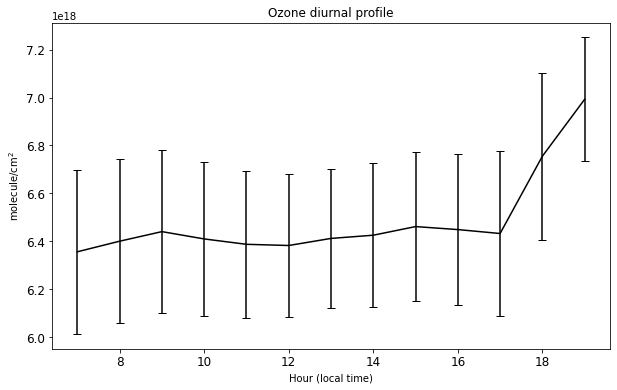

In [16]:
tslocmean.plot(colormap='gray',kind='line',figsize=(10,6),title='Ozone diurnal profile',xlabel='Hour (local time)',ylabel='molecule/cm$^2$',yerr=tslocstd,capsize=4,fontsize=12)

<AxesSubplot:title={'center':'Ozone yearly profile'}, xlabel='Month', ylabel='molecule/cm$^2$'>

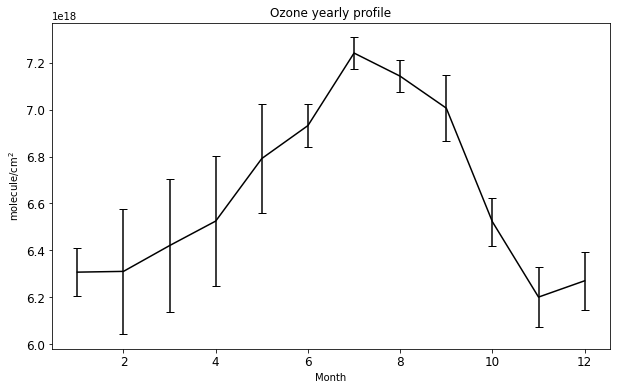

In [17]:
tslocmeanmt = tsloc_molcm2.ozone.groupby(tslocal.index.month).mean()
tslocstdmt = tsloc_molcm2.ozone.groupby(tslocal.index.month).std()
tslocmeanmt.plot(colormap='gray',kind='line',figsize=(10,6),title='Ozone yearly profile',xlabel='Month',ylabel='molecule/cm$^2$',yerr=tslocstdmt,capsize=4,fontsize=12)

In [ ]:
######## database manipulation in UTC, checked and behaves as original data

In [27]:
dfutc = rslt_df.assign(dtime=dtimeutc)
ts = dfutc.set_index('dtime')
ts

,ozone,uncty,o3massf,diffcorr,qflag,sum2iDQ1,sum2iDQ2
dtime,,,,,,,
2019-02-01 15:39:56+00:00,231.93,0.077097,1.915,0.0,0,0.0,0.0
2019-02-01 15:41:21+00:00,232.15,0.075858,1.900,0.0,0,0.0,0.0
2019-02-01 15:42:48+00:00,231.43,0.107100,1.886,0.0,0,0.0,0.0
2019-02-01 15:44:12+00:00,231.30,0.081117,1.871,0.0,0,0.0,0.0
2019-02-01 15:45:38+00:00,231.54,0.080339,1.858,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-25 17:08:18.600000+00:00,252.34,0.211250,1.062,0.0,10,0.0,0.0
2021-05-25 17:18:07.400000+00:00,252.42,0.080186,1.048,0.0,10,0.0,0.0
2021-05-25 17:32:50.400000+00:00,252.51,0.076676,1.030,0.0,10,0.0,0.0


In [28]:
ts.ozone.groupby(ts.index.hour).mean()

dtime
0     260.255217
12    253.399608
13    244.567032
14    239.191956
15    238.762829
16    237.866644
17    237.164966
18    237.222574
19    238.353270
20    239.559332
21    240.426911
22    240.170703
23    238.894343
Name: ozone, dtype: float64